In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

C:\Users\Shruti\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Shruti\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Shruti\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv('TEST.csv')

In [3]:
train

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


In [4]:
test

,Month,Avg_sunspot_count
0,1/1/2011,27.3
1,2/1/2011,48.3
2,3/1/2011,78.6
3,4/1/2011,76.1
4,5/1/2011,58.2
...,...,...
115,8/1/2020,7.5
116,9/1/2020,0.6
117,10/1/2020,14.6
118,11/1/2020,34.5


In [5]:
train.describe()

,Avg_sunspot_count
count,3144.000000
mean,82.994593
std,68.436447
min,0.000000
25%,25.000000
50%,69.000000
75%,125.000000
max,398.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3144 non-null   object
 1   Avg_sunspot_count  3144 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.2+ KB


In [7]:
train.duplicated().sum()

0

In [8]:
train["Month"] = pd.to_datetime(train["Month"], format='%m-%d-%Y') 

In [9]:
train["Month"]

0      1749-01-01
1      1749-02-01
2      1749-03-01
3      1749-04-01
4      1749-05-01
          ...    
3139   2010-08-01
3140   2010-09-01
3141   2010-10-01
3142   2010-11-01
3143   2010-12-01
Name: Month, Length: 3144, dtype: datetime64[ns]

In [10]:
train.set_index(train["Month"], inplace = True)
test.set_index(test["Month"], inplace = True)

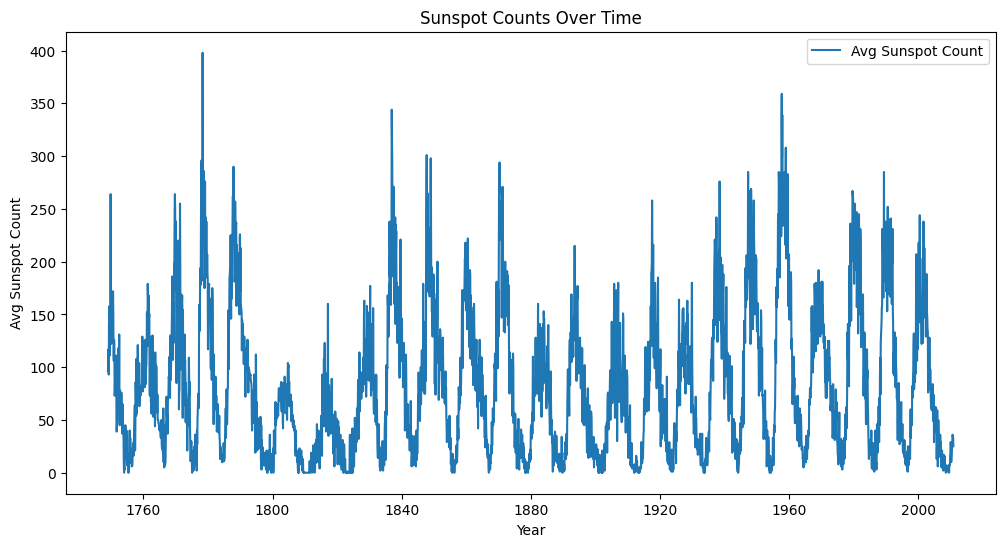

In [11]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Avg_sunspot_count'], label='Avg Sunspot Count')
plt.title('Sunspot Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Sunspot Count')
plt.legend()
plt.show()

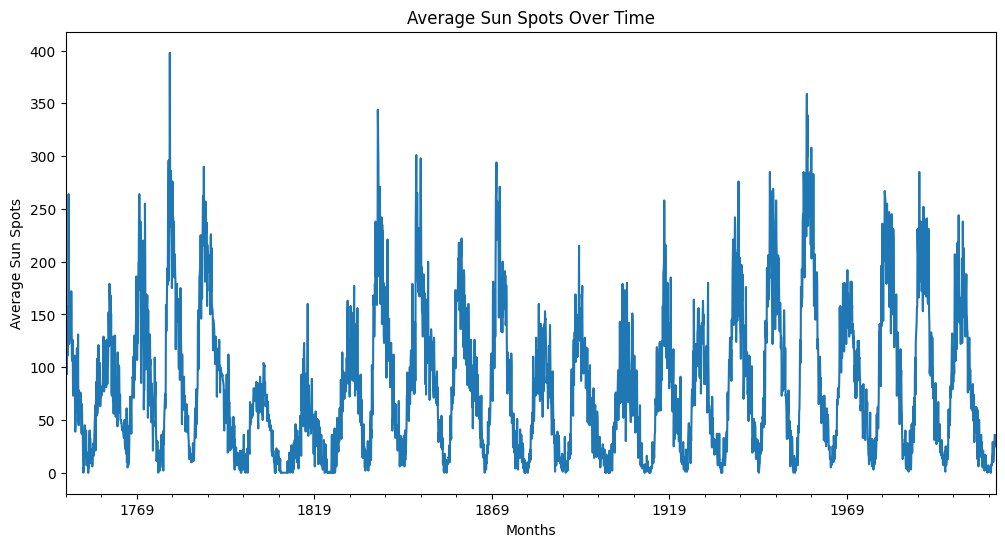

In [12]:
plt.figure(figsize=(12, 6))
train['Avg_sunspot_count'].plot()
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

In [13]:
train["Avg_sunspot_count"].mean()

82.99459287531806

In [14]:
train["Avg_sunspot_count"].median()

69.0

In [15]:
train.isna().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [16]:
max(train["Avg_sunspot_count"])

398

In [17]:
min(train["Avg_sunspot_count"])

0

In [18]:
train["Avg_sunspot_count"].var()

4683.547218606071

In [19]:
train["Avg_sunspot_count"].std()

68.43644656618336

In [20]:
df_yearly = train['Avg_sunspot_count'].resample('Y').mean()

C:\Users\Shruti\AppData\Local\Temp\ipykernel_26408\3379531971.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = train['Avg_sunspot_count'].resample('Y').mean()


In [21]:
df_yearly

Month
1749-12-31    135.000000
1750-12-31    139.166667
1751-12-31     79.666667
1752-12-31     79.750000
1753-12-31     51.083333
                 ...    
2006-12-31     24.666667
2007-12-31     12.583333
2008-12-31      4.250000
2009-12-31      4.750000
2010-12-31     25.000000
Freq: YE-DEC, Name: Avg_sunspot_count, Length: 262, dtype: float64

In [22]:
df_yearly.max()

268.9166666666667

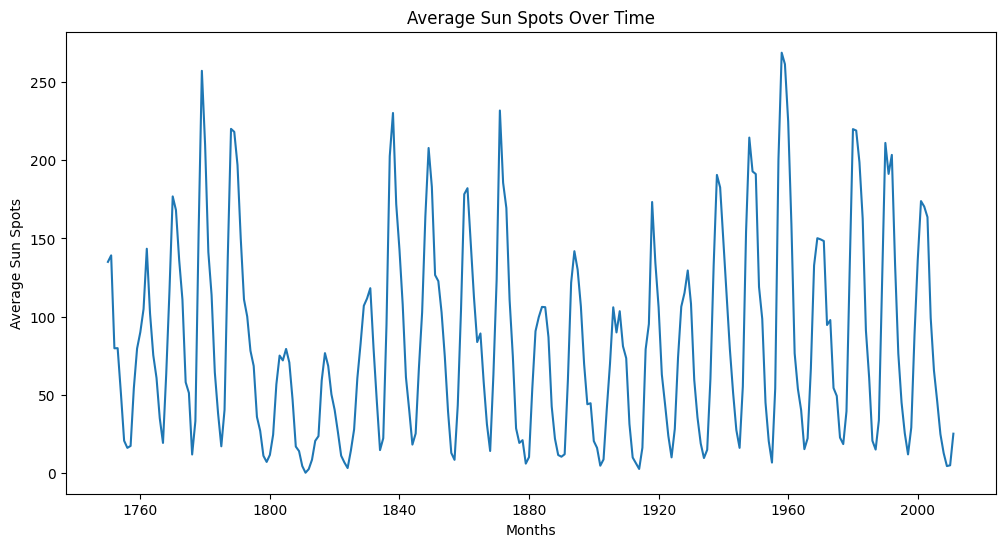

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly)
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

In [24]:
rolmea = train["Avg_sunspot_count"].rolling(window = 12).mean()
rolst = train["Avg_sunspot_count"].rolling(window = 12).std()

In [25]:
rolmea

Month
1749-01-01          NaN
1749-02-01          NaN
1749-03-01          NaN
1749-04-01          NaN
1749-05-01          NaN
                ...    
2010-08-01    17.416667
2010-09-01    19.833333
2010-10-01    22.000000
2010-11-01    24.250000
2010-12-01    25.000000
Name: Avg_sunspot_count, Length: 3144, dtype: float64

In [26]:
rolst

Month
1749-01-01         NaN
1749-02-01         NaN
1749-03-01         NaN
1749-04-01         NaN
1749-05-01         NaN
                ...   
2010-08-01    8.404094
2010-09-01    9.262175
2010-10-01    9.283416
2010-11-01    8.561276
2010-12-01    8.157540
Name: Avg_sunspot_count, Length: 3144, dtype: float64

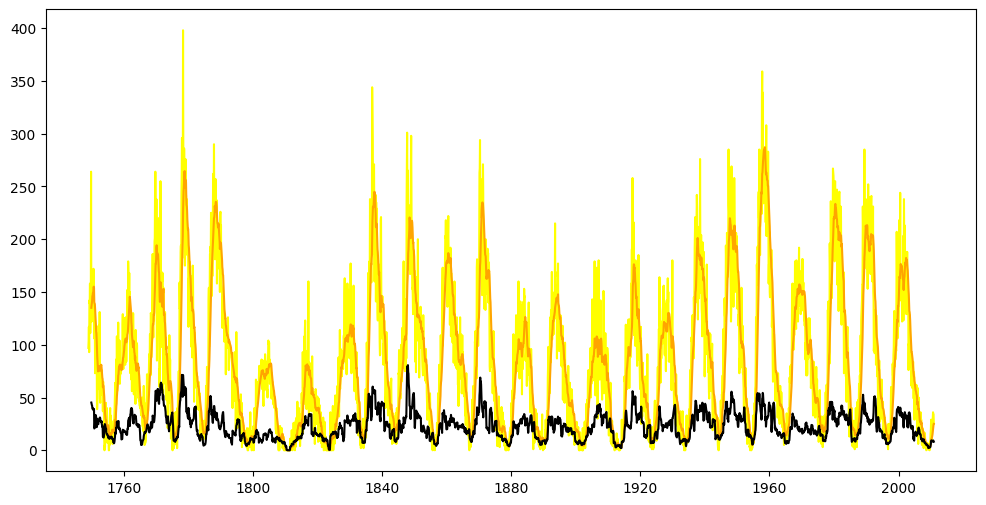

In [27]:
plt.figure(figsize = (12,6))
org = plt.plot(train["Avg_sunspot_count"], color = "yellow", label = "Original")
mea =plt.plot(rolmea.dropna(), color = "orange", label = "Rolling mean")
s = plt.plot(rolst.dropna(), color = "black", label = "Rolling std")

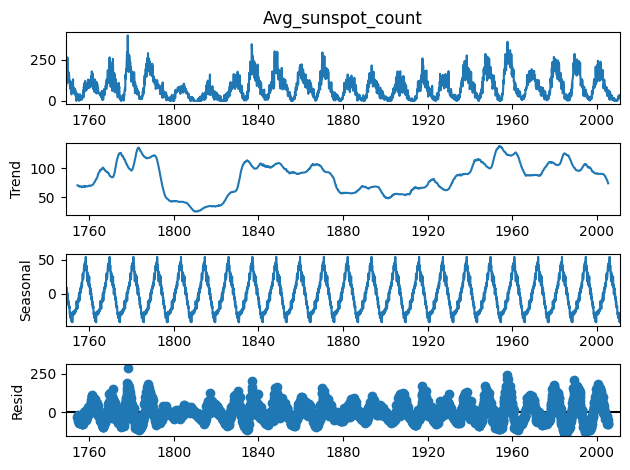

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train['Avg_sunspot_count'], model='additive', period=135)
result.plot()
plt.show()


In [45]:
train['Seasonal First Difference']=train['Avg_sunspot_count']-train['Avg_sunspot_count'].shift(12)


In [46]:
train['Seasonal First Difference']

Month
1749-01-01     NaN
1749-02-01     NaN
1749-03-01     NaN
1749-04-01     NaN
1749-05-01     NaN
              ... 
2010-08-01    30.0
2010-09-01    29.0
2010-10-01    26.0
2010-11-01    27.0
2010-12-01     9.0
Name: Seasonal First Difference, Length: 3144, dtype: float64

In [47]:
rolmean = train['Seasonal First Difference'].rolling(window = 120).mean()
rolstd = train['Seasonal First Difference'].rolling(window = 120).std()


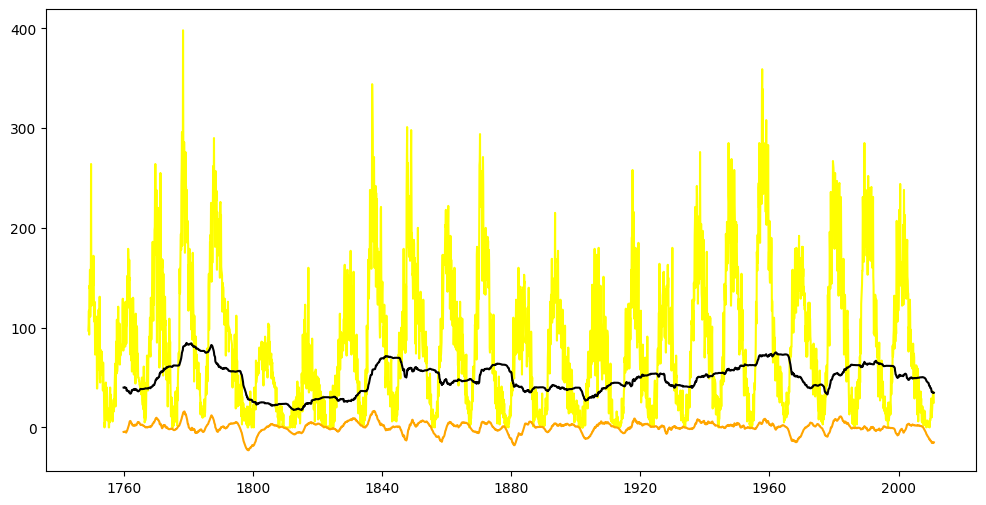

In [48]:
plt.figure(figsize = (12,6))
org = plt.plot(train["Avg_sunspot_count"], color = "yellow", label = "Original")
mea =plt.plot(rolmean.dropna(), color = "orange", label = "Rolling mean")
s = plt.plot(rolstd.dropna(), color = "black", label = "Rolling std")

In [49]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Avg_sunspot_count):
    result=adfuller(Avg_sunspot_count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [50]:
adfuller_test(train['Seasonal First Difference'].dropna())

ADF Test Statistic : -9.153250783958603
p-value : 2.6514321896652183e-15
#Lags Used : 25
Number of Observations Used : 3106
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [51]:
train['Seasonal First Difference'].dropna()

Month
1750-01-01    25.0
1750-02-01    23.0
1750-03-01    32.0
1750-04-01    54.0
1750-05-01     8.0
              ... 
2010-08-01    30.0
2010-09-01    29.0
2010-10-01    26.0
2010-11-01    27.0
2010-12-01     9.0
Name: Seasonal First Difference, Length: 3132, dtype: float64

<Axes: xlabel='Month'>

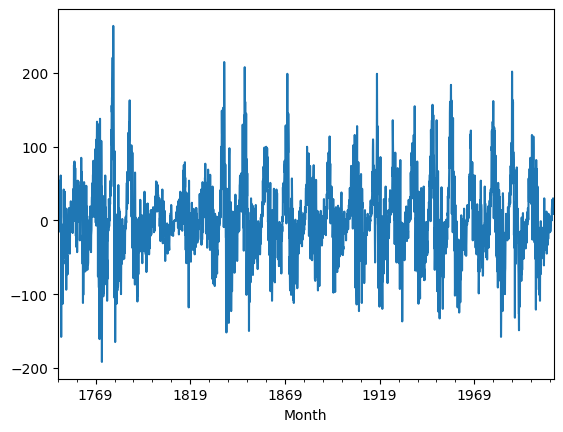

In [52]:
train['Seasonal First Difference'].plot()

In [53]:

max(train['Seasonal First Difference'].dropna())

264.0

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

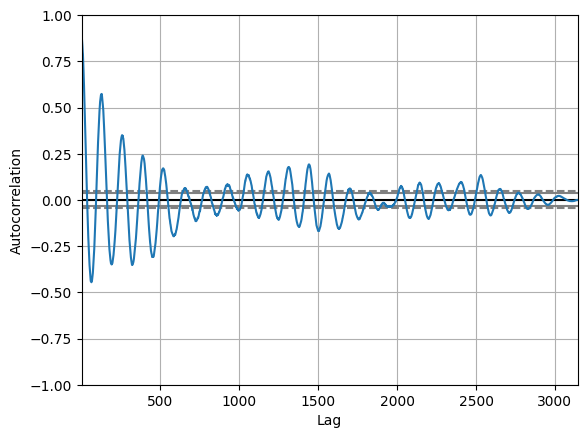

In [55]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Avg_sunspot_count'])
plt.show()

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


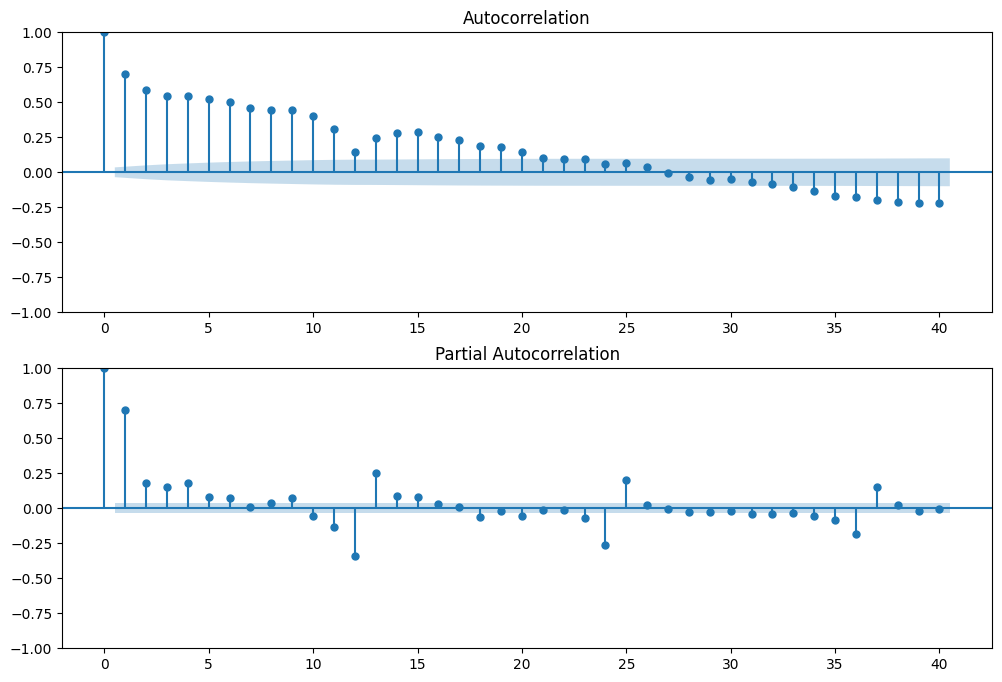

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig =plot_acf(train['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
model_SARIMA=SARIMAX(train['Avg_sunspot_count'],order=(2,1,7),seasonal_order=(2,1,7,12))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 25.787623847279


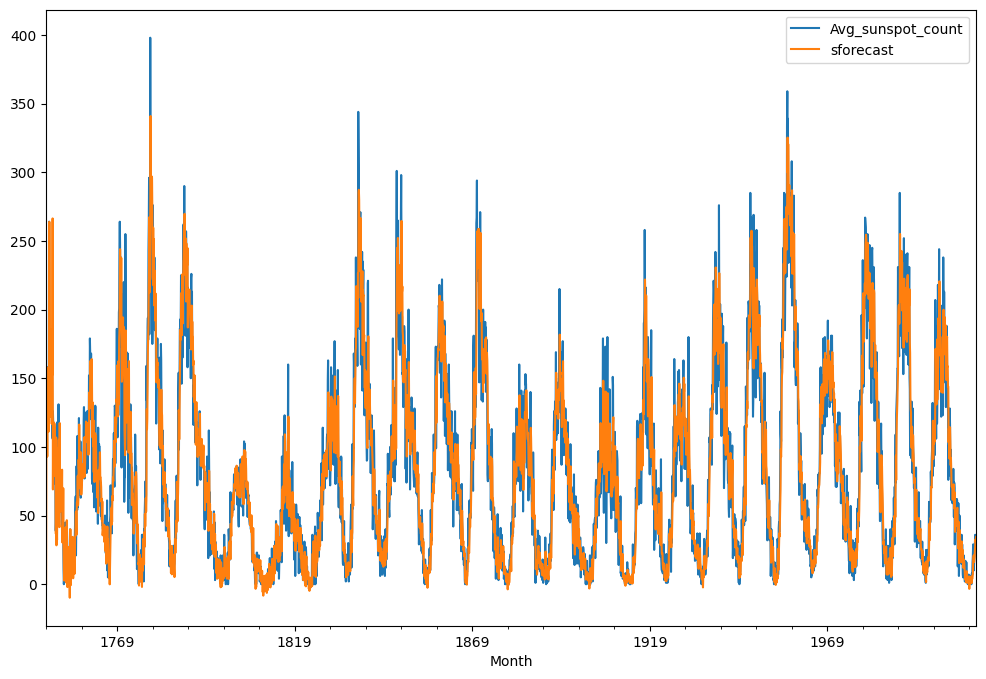

In [56]:
train["sforecast"] = model_SARIMA_fit.predict()
train[['Avg_sunspot_count','sforecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["sforecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [57]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 12)   Log Likelihood              -14571.330
Date:                            Sun, 15 Sep 2024   AIC                          29172.660
Time:                                    22:35:28   BIC                          29263.396
Sample:                                01-01-1749   HQIC                         29205.226
                                     - 12-01-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0132      0.350      0.038      0.970      -0.673       0.699
ar.L2          0.8484      0.327      2.597      0.009       0.208       1.489
ma.L1         -0.4497      0.349     -1.288      0.198      -1.134       0.235
ma.L2         -0.9934      0.479     -2.074      0.038      -1.932      -0.055
ma.L3          0.3196      0.093      3.446      0.001       0.138       0.501
ma.L4          0.1549      0.039      3.926      0.000       0.078       0.232
ma.L5          0.0765      0.027      2.872      0.004       0.024       0.129
ar.S.L12      -1.8641      0.114    -16.306      0.000      -2.088      -1.640
ar.S.L24      -0.9427      0.110     -8.559      0.000      -1.159      -0.727
ma.S.L12       0.8878      1.944      0.457      0.648      -2.923       4.699
ma.S.L24      -0.9389      3.673     -0.256      0.798      -8.137       6.259
ma.S.L36      -1.0021      1.855     -0.540      0.589      -4.638       2.634
ma.S.L48       0.0114      0.103      0.111      0.911      -0.190       0.213
ma.S.L60       0.0418      0.082      0.512      0.608      -0.118       0.202
sigma2       631.5770   1228.387      0.514      0.607   -1776.017    3039.171
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               884.91
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.17
Prob(H) (two-sided):                  0.87   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
start_date = test.index[0]
end_date = test.index[-1]
test["pred_Sarima"] = model_SARIMA_fit.predict(start=start_date,end= end_date)
#test['Avg_sunspot_count'] = scaler.fit_transform(test[['Avg_sunspot_count']])
rmse1 = np.sqrt(mean_squared_error(test['Avg_sunspot_count'], test["pred_Sarima"]))

print(f'Root Mean Squared Error (RMSE): {rmse1}')

Root Mean Squared Error (RMSE): 44.34402202079634


<Axes: xlabel='Month'>

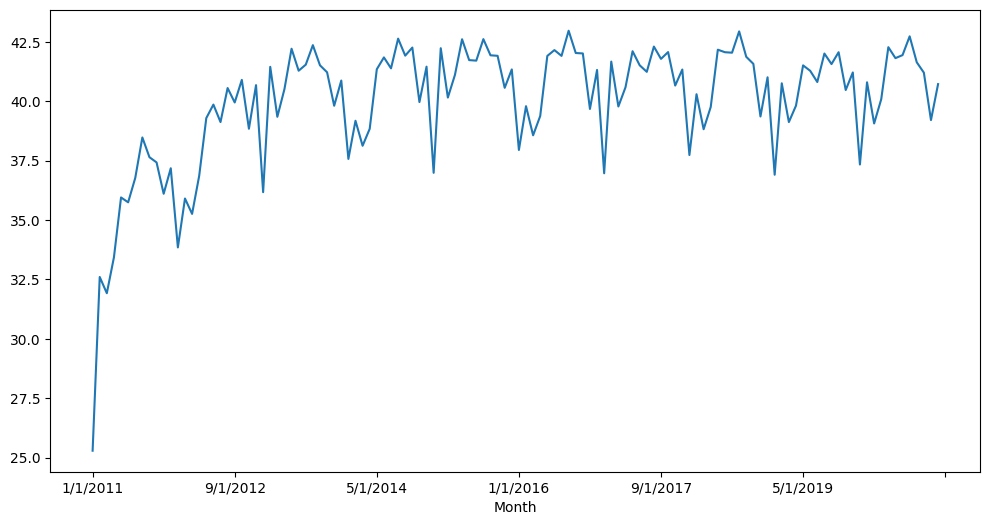

In [66]:
test["pred_Sarima"].plot(figsize = (12,6))

<Axes: xlabel='Month'>

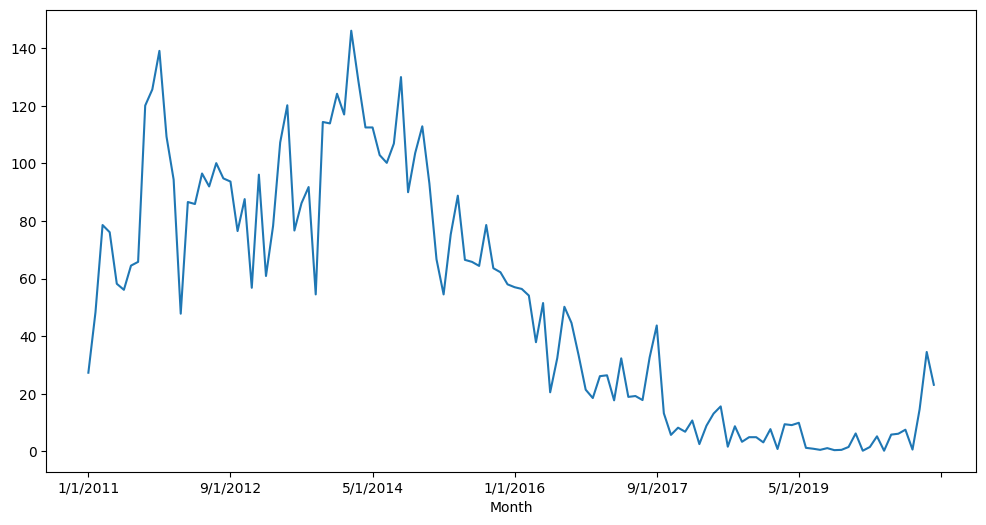

In [68]:
test["Avg_sunspot_count"].plot(figsize = (12,6))

In [61]:
model=SARIMAX(train['Avg_sunspot_count'],order=(3,1,7),seasonal_order=(3,1,7,12))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
model_fit_SARIMA=model.fit()

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 25.76768458653179


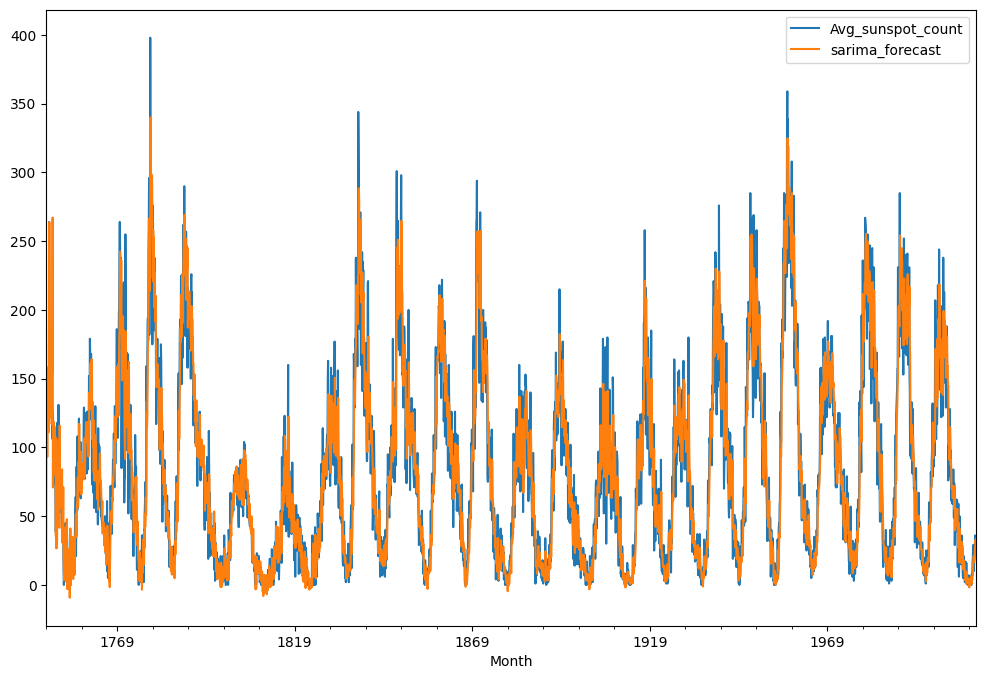

In [63]:
train["sarima_forecast"] = model_fit_SARIMA.predict()
train[['Avg_sunspot_count','sarima_forecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["sarima_forecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [64]:
start_date = test.index[0]
end_date = test.index[-1]
test["prediction"] = model_fit_SARIMA.predict(start=start_date,end = end_date)
rmse1 = np.sqrt(mean_squared_error(test['Avg_sunspot_count'], test["prediction"]))

print(f'Root Mean Squared Error (RMSE): {rmse1}')

Root Mean Squared Error (RMSE): 44.04477020690256


In [73]:
model1=SARIMAX(train['Avg_sunspot_count'],order=(3,1,9),seasonal_order=(3,1,9,12))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
model_SARIMA = model1.fit()

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 25.68419872695428


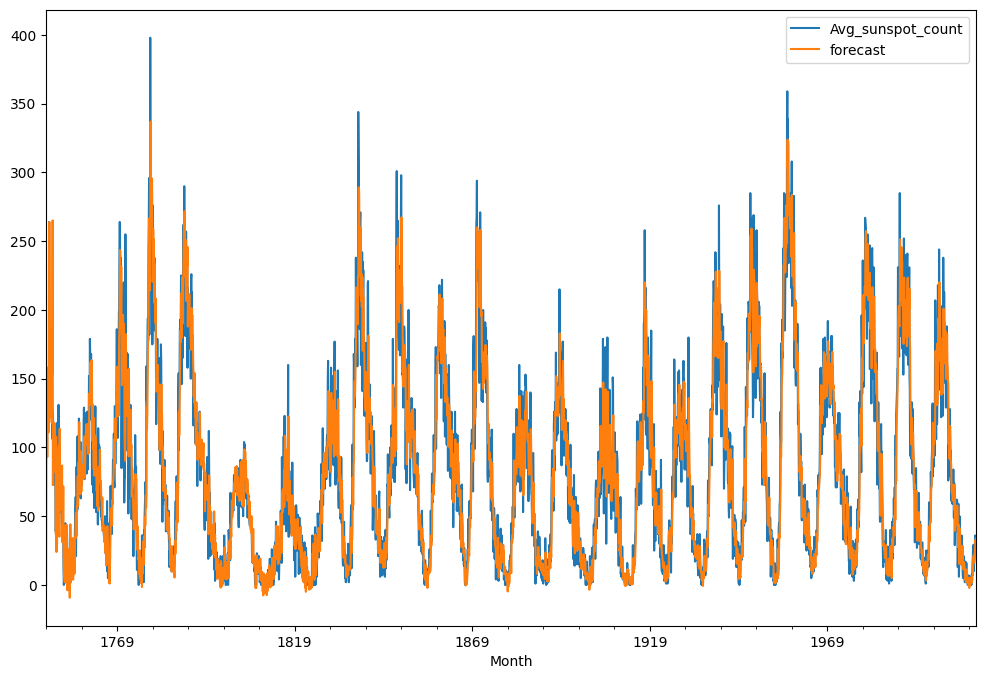

In [75]:
train["forecast"] = model_SARIMA.predict()
train[['Avg_sunspot_count','forecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["forecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [76]:
start_date = test.index[0]
end_date = test.index[-1]
test["prediction1"] = model_SARIMA.predict(start=start_date,end = end_date)
#test['Avg_sunspot_count'] = scaler.fit_transform(test[['Avg_sunspot_count']])
rmse1 = np.sqrt(mean_squared_error(test['Avg_sunspot_count'], test["prediction1"]))

print(f'Root Mean Squared Error (RMSE): {rmse1}')

Root Mean Squared Error (RMSE): 43.720281037224176
